### 1.2.1 : EDA: Advanced Feature Extraction.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS 1: Quora Question Pair Similarity/df_fe_without_preprocessing_train.csv')
df = df.fillna('')
df.shape

(100000, 17)

In [0]:
!pip install distance


     |████████████████████████████████| 184kB 3.5MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=1a06187a694d2aa7f135e4dfd1c0fab6b8383286fbba40b664e9409ff97dc875
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [0]:
pip install fuzzywuzzy

In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [0]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# To get the result in 4 decimal points
SAFE_DIV=0.0001

STOP_WORDS=stopwords.words("english")

def preprocessor(x):
  x=str(x).lower()
  x=x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
  x = re.sub(r"([0-9]+)000000", r"\1m", x)
  x = re.sub(r"([0-9]+)000", r"\1k", x)

  porter=PorterStemmer()
  pattern=re.compile('\W')

  if type(x) == type(""):
    x=re.sub(pattern,' ',x)
  
  if type(x) == type(""):
    x=porter.stem(x)
    example1=BeautifulSoup(x)
    x=example1.get_text()

  return x


<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def get_token_features(q1,q2):
  token_features = [0.0]*10

  # Converting the Sentence into Tokens :
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features
  
  # tokens that are not in stop words are called words
  q1_words = set ([ word for word in q1_tokens if word not in STOP_WORDS ])
  q2_words = set ([ word for word in q2_tokens if word not in STOP_WORDS ])
  
  # tokens that are stop words listed
  q1_stops = set ([ word for word in q1_tokens if word in STOP_WORDS ])
  q2_stops = set ([ word for word in q2_tokens if word in STOP_WORDS ])

  # common_word_count , common_stop_count , common_token_count
  common_word_count = len (set(q1_words).intersection(q2_words))
  common_stop_count = len (set(q1_stops).intersection(q2_stops))
  common_token_count = len (set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0] = common_word_count / (min (len(q1_words) , len(q2_words)) +SAFE_DIV)
  token_features[1] = common_word_count / (max (len(q1_words) , len(q2_words)) +SAFE_DIV)
  token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
  token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
  
  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
  # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
  token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
  #Average Token Length of both Questions
  token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
  return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)



 
def extract_feature(df):
  #First we preprocessed the dataframe
  df['question1'] = df['question1'].fillna("").apply(preprocessor)
  df['question1'] = df['question1'].fillna("").apply(preprocessor)

  #Merging Features with dataframe

  token_features = df.apply(lambda x: get_token_features(x["question1"], x['question2']), axis=1)
  df["cwc_min"]       = list(map(lambda x: x[0], token_features))
  df["cwc_max"]       = list(map(lambda x: x[1], token_features))
  df["csc_min"]       = list(map(lambda x: x[2], token_features))
  df["csc_max"]       = list(map(lambda x: x[3], token_features))
  df["ctc_min"]       = list(map(lambda x: x[4], token_features))
  df["ctc_max"]       = list(map(lambda x: x[5], token_features))
  df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
  df["first_word_eq"] = list(map(lambda x: x[7], token_features))
  df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
  df["mean_len"]      = list(map(lambda x: x[9], token_features))

    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
  print("fuzzy features..")
  
  df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
  # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
  # then joining them back into a string We then compare the transformed strings with a simple ratio().
  df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
  df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
  df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
  df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
  return df
  

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
print("Extracting features for train:")
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS 1: Quora Question Pair Similarity/questions.csv", nrows=1000)
df=df.fillna("")
df = extract_feature(df)
df.to_csv("nlp_features_train.csv", index=False, sep='\t')
#from google.colab import files
#files.download("final_features.csv")
df.head(4)

Extracting features for train:
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.666656,0.666656,0.999980,0.833319,0.749994,0.642853,0,0,2,13.0,100,93,93,96,0.948276
1,1,3,4,what is the story of kohinoor koh i noor dia...,What would happen if the Indian government sto...,0,0.199996,0.099999,0.499975,0.199996,0.199998,0.153845,0,0,3,11.5,86,63,66,61,0.173077
2,2,5,6,how can i increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.166664,0.166664,0.249994,0.124998,0.199998,0.142856,0,0,4,12.0,63,63,43,38,0.150000
3,3,7,8,why am i mentally very lonely how can i solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,10.0,28,24,9,8,0.039216


In [0]:
uploaded = drive.CreateFile({'title': 'nlp_features_train.csv'})
uploaded.SetContentFile('nlp_features_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1flRMZuG48VA47FfxVIlO7rxqfcRVdgXs


In [0]:
from google.colab import files
files.download("nlp_features_train.csv")

MessageError: ignored

In [0]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')
from google.colab import files
files.download("train_p.txt")
files.download("train_n.txt")

Number of data points in class 1 (duplicate pairs) : 74522
Number of data points in class 0 (non duplicate pairs) : 125478


In [0]:
p

array(['astrology  i am a capricorn sun cap moon and cap rising   what does that say about me ',
       "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
       'how can i be a good geologist ', ...,
       'Which is the best country to do an MS in Mechanical Engineering?',
       'how can you stop caring about someone who does not care about you ',
       "How can I stop caring about a girl who doesn't care about me?"],
      dtype=object)

In [0]:
d = path.dirname('.')
textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()

stopwords=set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 4019251
Total number of words in non duplicate pair questions : 8136489


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


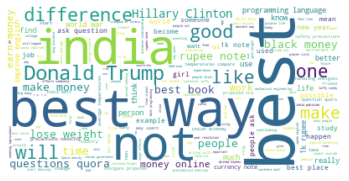

In [0]:
wc=WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pair


<function matplotlib.pyplot.show>

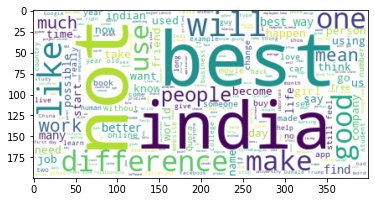

In [0]:
wc=WordCloud(background_color="white", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
print("Word Cloud for non-Duplicate Question pair")
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("on")
plt.show

In [0]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

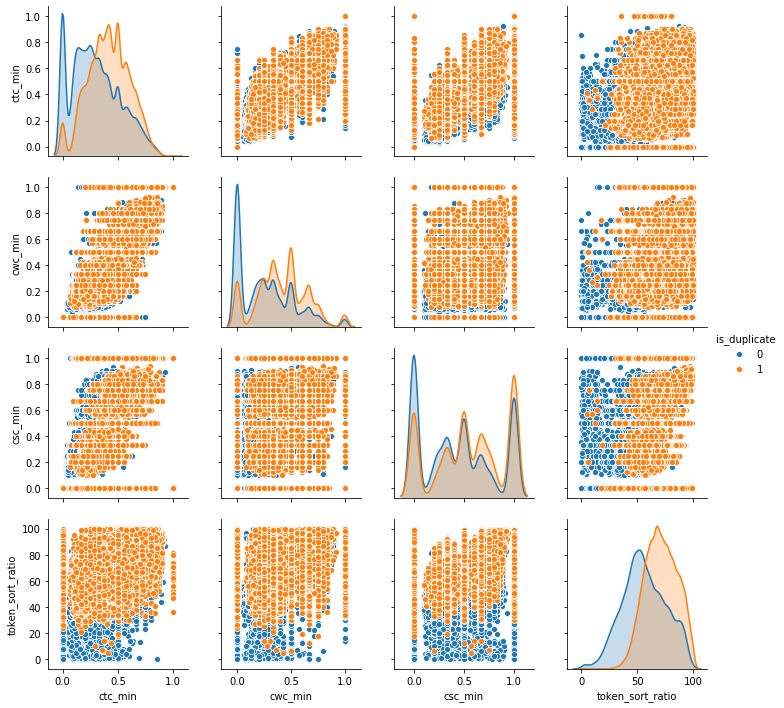

In [0]:
n=df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']] [0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()